In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from dtreeviz.trees import dtreeviz # remember to load the package

import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df = df.drop("time", axis=1)
df.info()
# count_class_0, count_class_1 = df['DEATH_EVENT'].value_counts()

# df_class_0 = df[df['DEATH_EVENT'] == 'No']
# df_class_1 = df[df['DEATH_EVENT'] == 'Yes']

# df_class_0_under = df_class_0.sample(count_class_1, random_state=42)

# df = pd.concat([df_class_0_under, df_class_1], axis=0).reset_index(drop=True)
# df.DEATH_EVENT.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    object 
dtypes: float64(3), int64(8), object(1)
memory usage: 28.2+ KB


In [31]:
X = df.drop(columns=['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT'].copy()

x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)

clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

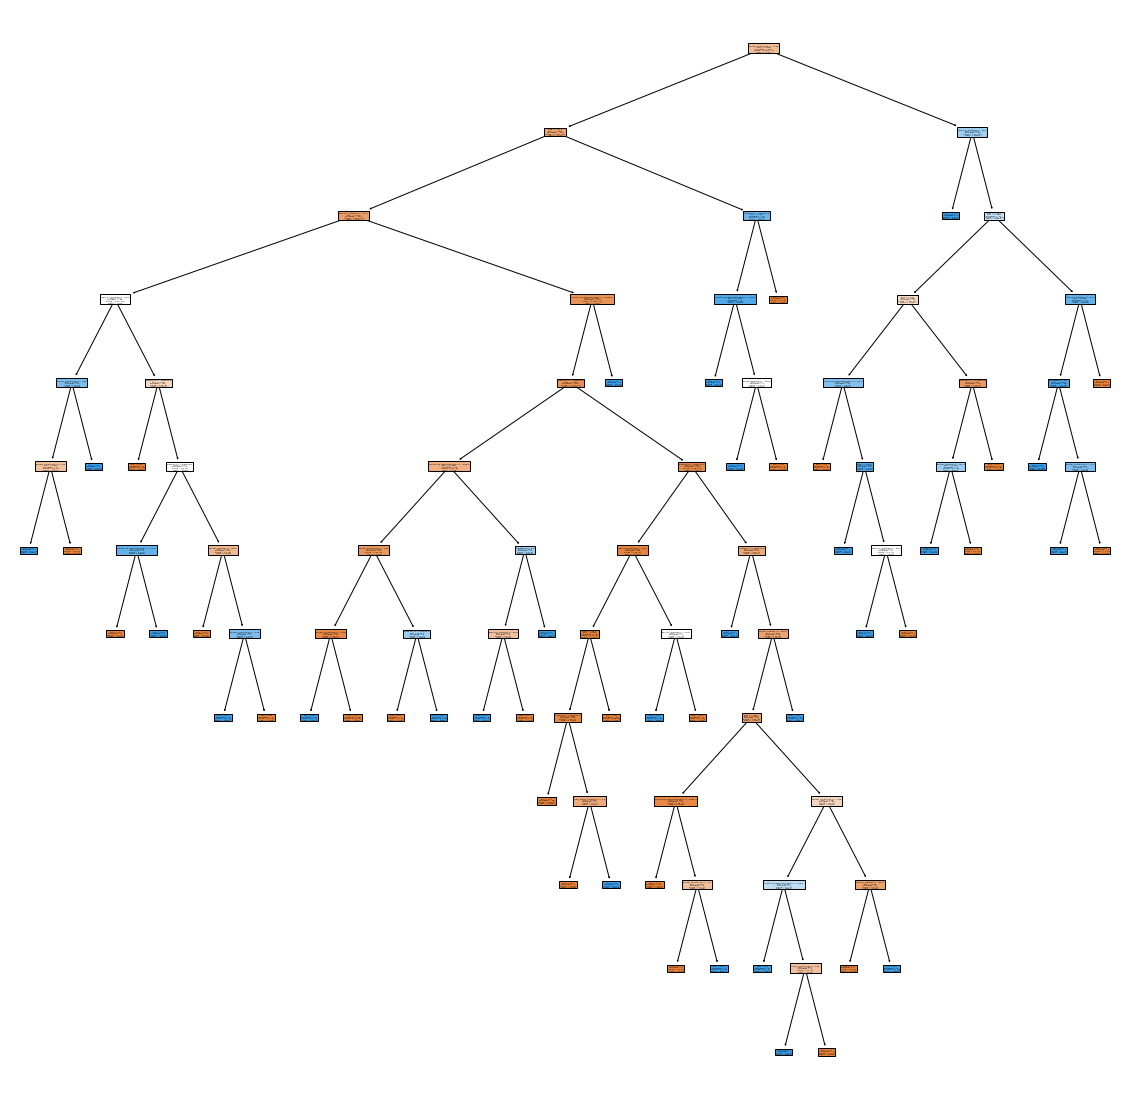

In [32]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Alive','Dead']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

Train score 1.0
Test score 0.7333333333333333
Train Confusion matrix


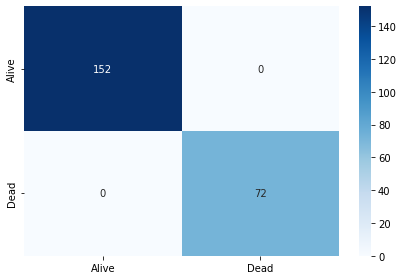

Test Confusion matrix


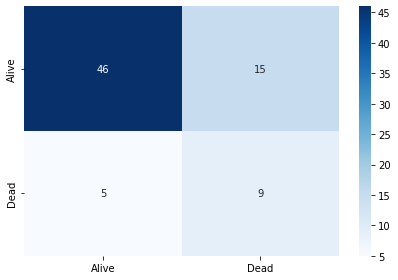

In [33]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [34]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.7767857142857143
Test score 0.7066666666666667
Train Confusion matrix


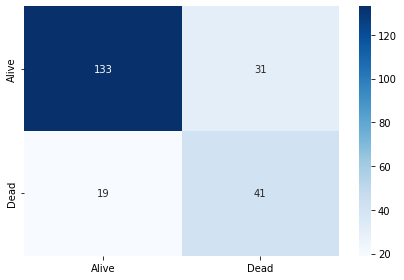

Test Confusion matrix


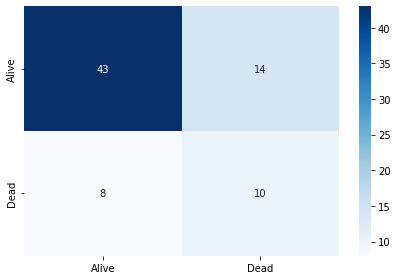

In [35]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

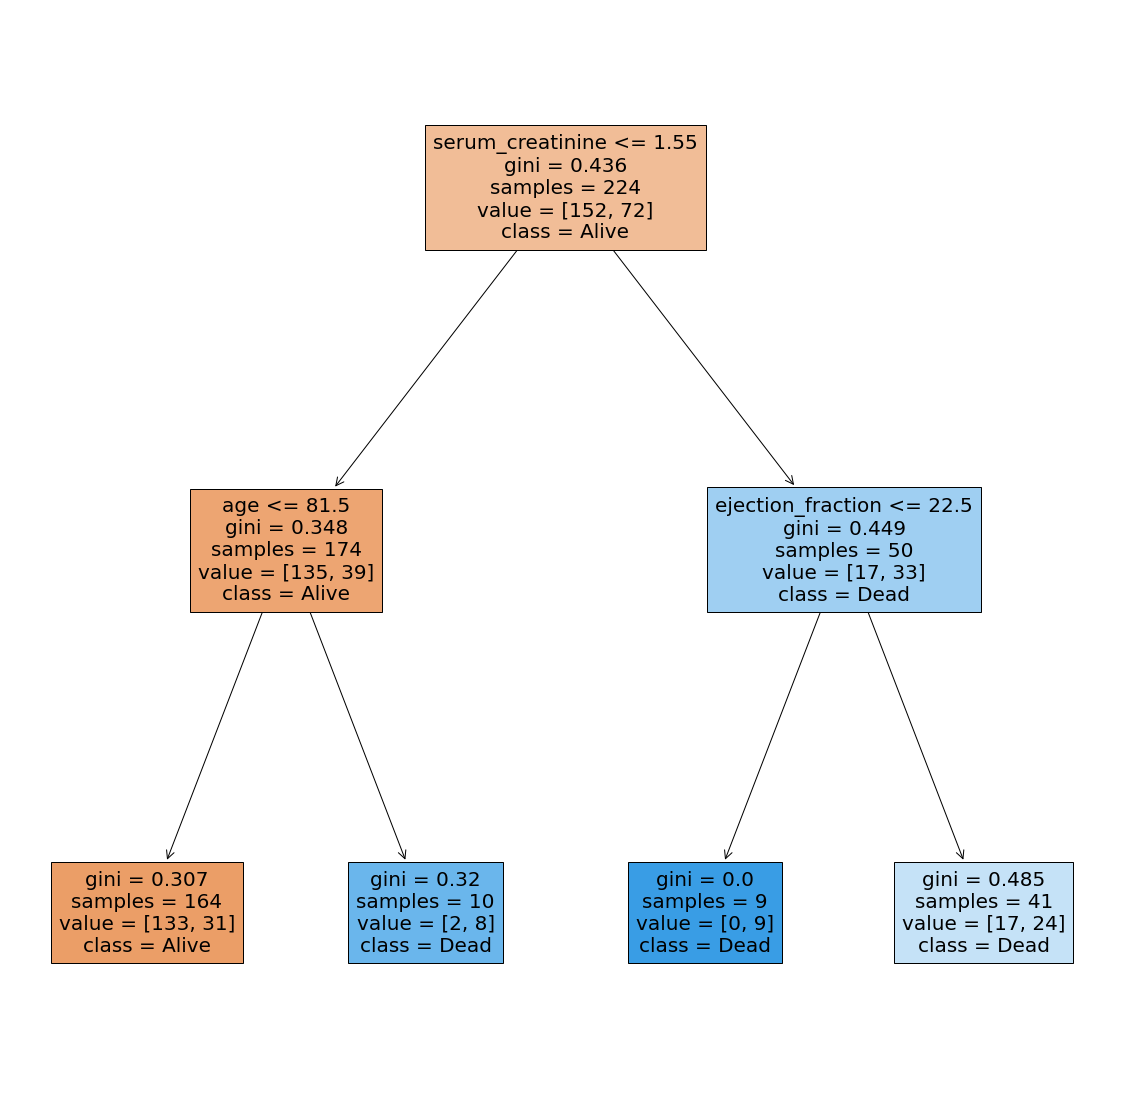

In [36]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Alive','Dead']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

[0.         0.00293803 0.00396825 0.00396825 0.00416667 0.00420168
 0.00429831 0.00595238 0.00595238 0.00595238 0.00595238 0.00634921
 0.00650174 0.00669643 0.00744048 0.00744048 0.00835514 0.00874256
 0.00915751 0.01154401 0.01372549 0.01450978 0.02915396 0.03141408
 0.06587966]


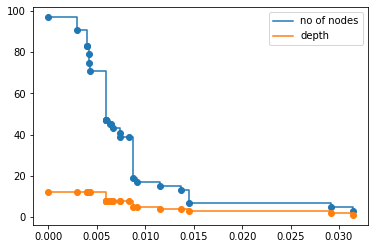

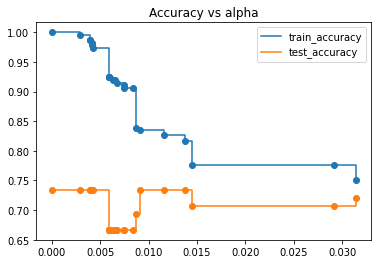

In [37]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.7767857142857143
Test score 0.7066666666666667
Train Confusion matrix


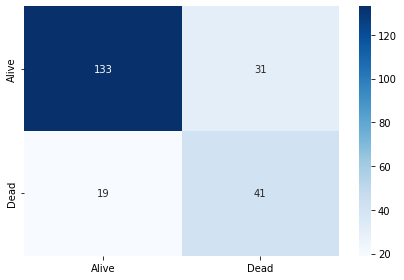

Test Confusion matrix


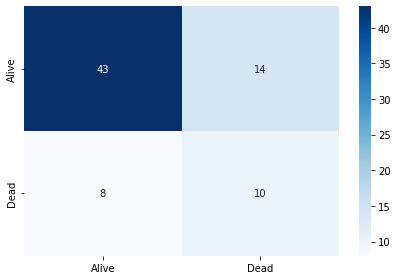

In [38]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.015)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

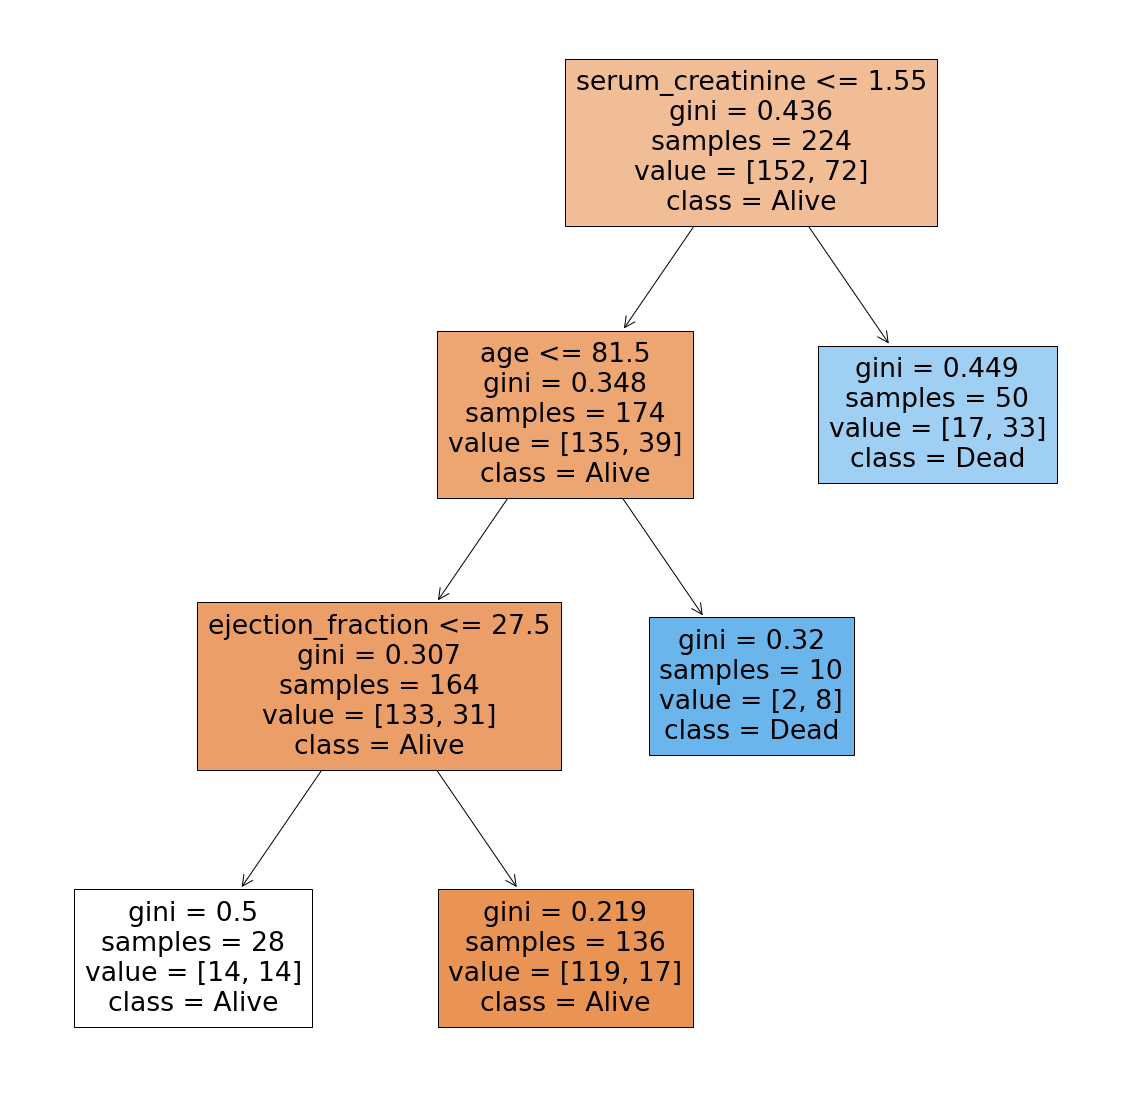

In [39]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Alive','Dead']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

In [22]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

X = df.drop("DEATH_EVENT", axis=1)
y = np.where(df["DEATH_EVENT"] == "Yes", 1, 0)

x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)

gmm = GaussianMixture(n_components=3, random_state=5520)
gmm.fit(X)

GaussianMixture(n_components=3, random_state=5520)

Train score 0.12946428571428573
Test score 0.18666666666666668
Train Confusion matrix


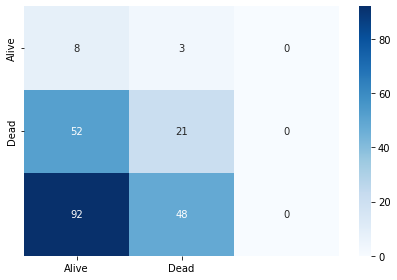

Test Confusion matrix


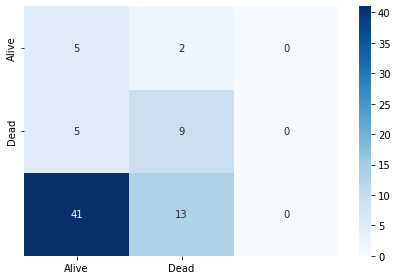

In [23]:
y_train_pred = gmm.predict(x_train)
y_test_pred = gmm.predict(x_test)

def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=["Alive", "Dead"]
               ,xticklabels=["Alive", "Dead"],cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [4]:
from sklearn.tree._tree import TREE_LEAF

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

print(sum(model.tree_.children_left < 0))
# start pruning from the root
prune_index(model.tree_, 0, 5)
sum(model.tree_.children_left < 0)

42


52

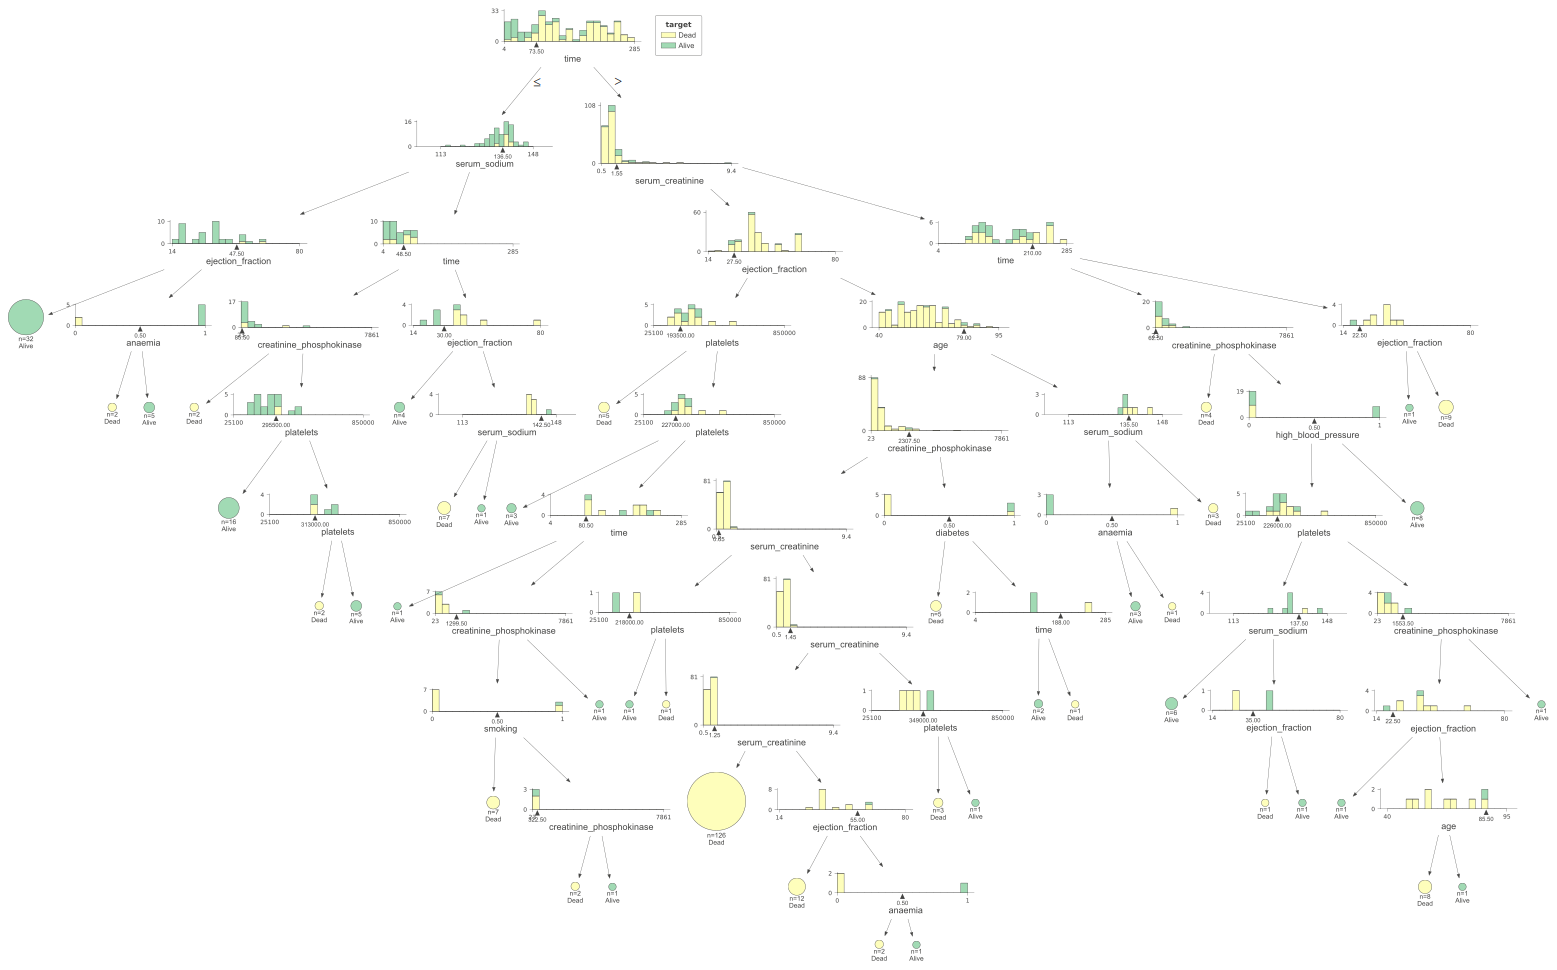

In [18]:
viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=list(X.columns),
                class_names=["Dead", "Alive"])

viz

In [26]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,Yes
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,Yes
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,Yes
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,Yes
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,No
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,No
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,No
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,No


In [ ]:
["Age", "Creatinine Phosphokinase", "Ejection Fraction", "Platelets", "Serum Creatinine", "Serum Sodium", "Time"]
["Anaemia", "Diabetes", "High Blood Pressure", "Sex", "Smoking"]